In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import IsolationForest

rawdata = pd.read_csv('valid.csv')

In [6]:

def isoforest(outliers_fraction=0.05, random_state=42, push_model=False):
        iso = IsolationForest(contamination=outliers_fraction, random_state=random_state)
        md = iso.fit(data, None)
        if push_model:
            joblib.dump(datacols, 'params')
            joblib.dump(md, 'model')
        return test(md)

In [7]:
from sklearn.metrics import f1_score
def test(model):
    pred = model.predict(X)
    if -1 in pred:
        pred = [1 if p == -1 else 0 for p in pred]
    return f1_score(actual, pred)

In [2]:
# get the first 100000 data and drop Anomaly from data read in csv
data = rawdata.head(100000).drop('Anomaly', axis=1)

In [3]:
'''
Preprocessing of Data
'''
# These column entry is not used, drop it
temp = ['du-id', 'measTimeStampRf', 'ue-id', 'nrCellIdentity', 'targetTput', 'x', 'y']
for col in data.columns:
    #if column entry contains 'nb', drop it aswell
    if 'nb' in col:
        temp.append(col)
# drop all the unused data
if set(temp).issubset(data.columns):
    temp = data[temp]
    data = data.drop(temp, axis=1)
# Filter datas that are not numbers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data = data.select_dtypes(include=numerics)

# Remove all NAN data
data = data.dropna(axis=0)

# Remove data that is constant
data = data.loc[:, data.apply(pd.Series.nunique) != 1]

# Remove any data with correlation higher than 0.98
corr = data.corr().abs()
corr = pd.DataFrame(np.tril(corr, k=-1), columns=data.columns)
drop = [column for column in corr.columns if any(corr[column] > 0.98)]
data = data.drop(drop,axis = 1)
print(data)
#normalize data
scale = Normalizer()  # StandardScaler()
data2 = scale.fit_transform(data)
data = pd.DataFrame(data2, columns=data.columns)
import joblib
joblib.dump(scale, 'scale')
print(data)

      prb_usage  throughput       rsrq     rssinr
0          77.0    0.300000 -10.794134  32.718077
1          58.0    0.100000 -40.793356  14.490984
2          56.0    0.100000 -40.793183  15.007806
3          45.0    0.076249 -40.793541  13.999070
4          59.0    0.100000 -40.793484  14.146399
...         ...         ...        ...        ...
9995       45.0    0.065244 -40.794649  11.848960
9996       91.0    0.148048 -40.793792  13.410441
9997       62.0    0.250000 -10.793631  33.778925
9998       45.0    0.186928 -10.793272  34.733710
9999       50.0    0.100000 -40.792735  16.725665

[10000 rows x 4 columns]
      prb_usage  throughput      rsrq    rssinr
0      0.912789    0.003556 -0.127958  0.387853
1      0.801385    0.001382 -0.563641  0.200222
2      0.789961    0.001411 -0.575447  0.211707
3      0.721958    0.001223 -0.654471  0.224594
4      0.806991    0.001368 -0.557965  0.193492
...         ...         ...       ...       ...
9995   0.727169    0.001054 -0.659214 

In [5]:
"""
Modelling of Data
"""
datatomodel = data
datacols = data.columns
test =  rawdata.head(100000)
actual = test['Anomaly']
X = test[datacols]
sc = joblib.load('scale')
X = sc.transform(X)

In [9]:
scores = []
for of in np.arange(0.01, 0.4, 0.01):
    scores.append(isoforest(outliers_fraction=of))
opt_f1 = scores.index(max(scores)) + 1
isoforest(outliers_fraction=opt_f1*0.01, push_model=True)
print("Optimum value of contamination : {}".format(opt_f1*0.01))
print('Training Ends : ')

Optimum value of contamination : 0.28
Training Ends : 


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rssinr'>

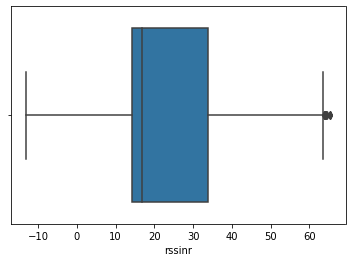

In [7]:
import seaborn as sns
sns.boxplot(data.rssinr)

In [5]:
print(data)

      prb_usage  throughput        rsrp       rsrq     rssinr
0          77.0    0.300000  -89.510710 -10.794134  32.718077
1          58.0    0.100000 -117.737803 -40.793356  14.490984
2          56.0    0.100000 -117.220982 -40.793183  15.007806
3          45.0    0.076249 -118.229717 -40.793541  13.999070
4          59.0    0.100000 -118.082389 -40.793484  14.146399
...         ...         ...         ...        ...        ...
9995       45.0    0.065244 -120.379828 -40.794649  11.848960
9996       91.0    0.148048 -118.818347 -40.793792  13.410441
9997       62.0    0.250000  -88.449863 -10.793631  33.778925
9998       45.0    0.186928  -87.495078 -10.793272  34.733710
9999       50.0    0.100000 -115.503122 -40.792735  16.725665

[10000 rows x 5 columns]
